# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# Loading the data

In [2]:
df = pd.read_csv('./Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Understanding the dataset

The dataset has the following features:
1. Species: Name of the fish species
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

So, for each fish we have its species, weight, width, lengths and height.

In [3]:
df.shape

(159, 7)

This is a relatively small dataset with data related to just 159 fishes and their 7 attributes.

In [4]:
df['Species'].nunique()

7

The dataset has information associated with 7 species of fish. 

In [5]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

The dataset is imbalanced with fishes in different species ranging from 6 to 56. This indicates that predicting the species of the fish is a tough job here as we do not have enough training data. We would rather try to predict the weight of the fishes. 

Hence, we dependent variable is Weight and our independent variables are Species, Length1, Length2, Length3, Height, Width.

## Checking for null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


From the dataset info, we can see that the data types of the features have been marked correctly.

In [7]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

We can see that there are no null values in the dataset. 

## Statistics

In [8]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Exploratory Data Analysis

## Count plot for different species of fishes

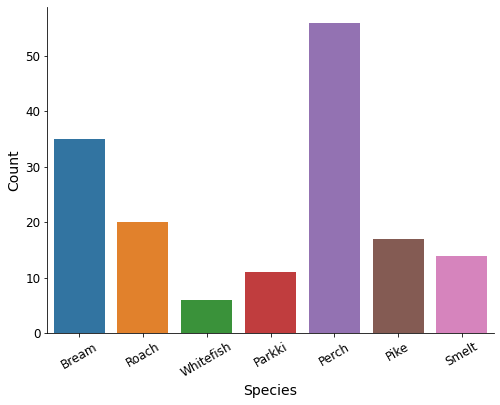

In [9]:
rcParams['figure.figsize'] = 8,6

sns.countplot(df['Species'])
plt.xlabel('Species', size=14)
plt.ylabel('Count', size=14)
plt.xticks(rotation=30, size=12)
plt.yticks(size=12)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

The Perch species has the most fishes while the Whitefish species has the least fishes in the given dataset.

## Boxplots for knowing data distribution and detecting outliers

Boxplot is a standard way of displaying the distribution of data based on a five number summary - minimum, first quartile, second quartile (median), third quartile, maximum. It also tells about outliers and their values, the distribution of the data - whether the data is symmetrical or not, whether the data is skewed or not, if it is skewed then whether it is skewed to the right or to the left, how tightly the data is grouped.

### Boxplot for Length1 and Species

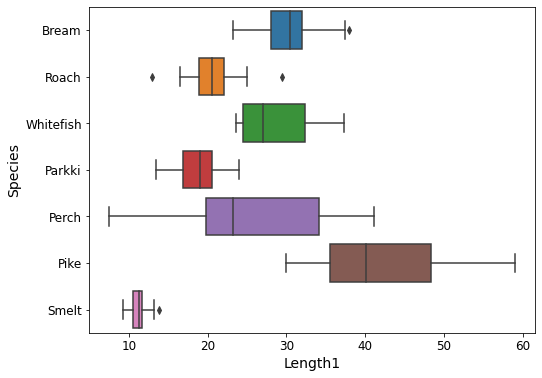

In [10]:
sns.boxplot(df['Length1'], df['Species'])

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Length1', size=14)
plt.ylabel('Species', size=14)

plt.show()

We can see a few outliers in this multivariate boxplot plotted using one categorical variable (Species) and one continuous variable (Length1). However, things doesn't seem to be much indicative as the distribution of data for each species is different. Also, the boxplot is just for Length1 but we should check this for all the attributes.
So, we will analyze the univariate outliers using the boxplot for each of these attributes to get a general idea about outliers in each attribute.

### Boxplot for Length1

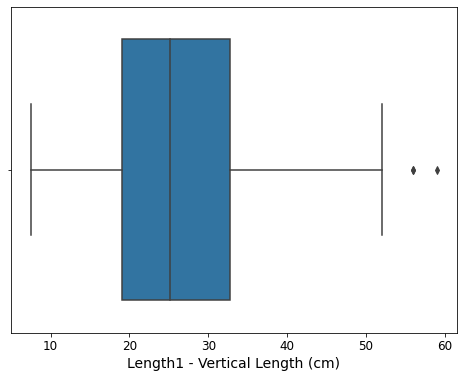

In [11]:
sns.boxplot(df['Length1'])
plt.xticks(size=12)
plt.xlabel('Length1 - Vertical Length (cm)', size=14)

plt.show()

We can see that two fishes in our dataset have Length1 way different from the others. So, these two values are outliers for Length1 in our dataset. 

#### Analyzing outliers for Length1

In [12]:
df_L1 = df['Length1']

#quartiles
df_L1_q1 = df_L1.quantile(0.25)
df_L1_q2 = df_L1.quantile(0.5)
df_L1_q3 = df_L1.quantile(0.75)

#inter quartile range
df_L1_iqr = df_L1_q3 - df_L1_q1

#lower whisker point
df_L1_lower = df_L1_q1 - (1.5 * df_L1_iqr)

#upper whisker point
df_L1_upper = df_L1_q3 + (1.5 * df_L1_iqr)

df_L1_outliers = df_L1[(df_L1 < df_L1_lower) | (df_L1 > df_L1_upper)]
df_L1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

The observations 142, 143 and 144 are outliers in case of Length1.

### Boxplot for Length2

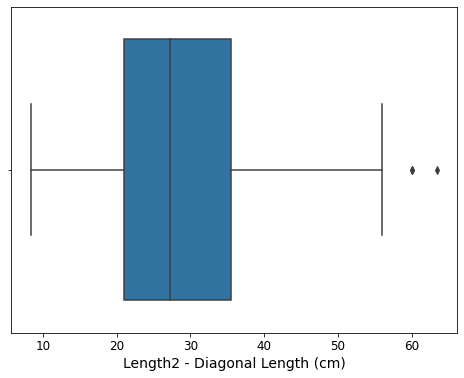

In [13]:
sns.boxplot(df['Length2'])
plt.xticks(size=12)
plt.xlabel('Length2 - Diagonal Length (cm)', size=14)

plt.show()

#### Analyzing outliers for Length2

In [14]:
df_L2 = df['Length2']

#quartiles
df_L2_q1 = df_L2.quantile(0.25)
df_L2_q2 = df_L2.quantile(0.5)
df_L2_q3 = df_L2.quantile(0.75)

#inter quartile range
df_L2_iqr = df_L2_q3 - df_L2_q1

#lower whisker point
df_L2_lower = df_L2_q1 - (1.5 * df_L2_iqr)

#upper whisker point
df_L2_upper = df_L2_q3 + (1.5 * df_L2_iqr)

df_L2_outliers = df_L2[(df_L2 < df_L2_lower) | (df_L2 > df_L2_upper)]
df_L2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

The observations 142, 143 and 144 are outliers in case of Length2.

### Boxplot for Length3

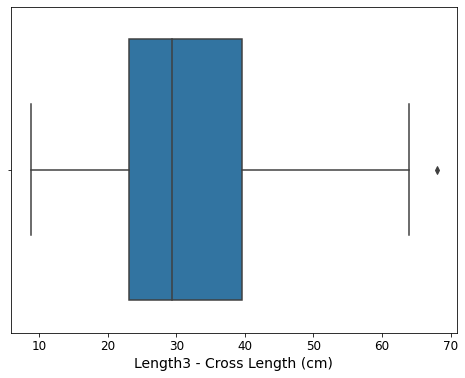

In [15]:
sns.boxplot(df['Length3'])
plt.xticks(size=12)
plt.xlabel('Length3 - Cross Length (cm)', size=14)

plt.show()

#### Analyzing outliers for Length3

In [16]:
df_L3 = df['Length3']

#quartiles
df_L3_q1 = df_L3.quantile(0.25)
df_L3_q2 = df_L3.quantile(0.5)
df_L3_q3 = df_L3.quantile(0.75)

#inter quartile range
df_L3_iqr = df_L3_q3 - df_L3_q1

#lower whisker point
df_L3_lower = df_L3_q1 - (1.5 * df_L3_iqr)

#upper whisker point
df_L3_upper = df_L3_q3 + (1.5 * df_L3_iqr)

df_L3_outliers = df_L3[(df_L3 < df_L3_lower) | (df_L3 > df_L3_upper)]
df_L3_outliers

144    68.0
Name: Length3, dtype: float64

The observation 144 is an outlier in case of Length3.

### Boxplot for Width

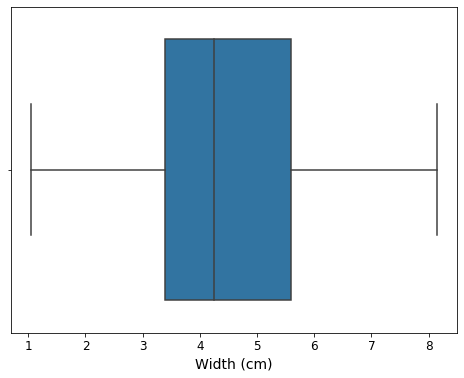

In [17]:
sns.boxplot(df['Width'])
plt.xticks(size=12)
plt.xlabel('Width (cm)', size=14)

plt.show()

We can see that the Width attribute has no outliers.

### Boxplot for Height

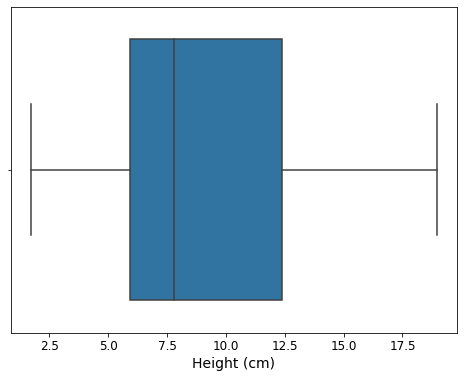

In [18]:
sns.boxplot(df['Height'])
plt.xticks(size=12)
plt.xlabel('Height (cm)', size=14)

plt.show()

We can see that the Height attribute has no outliers.

### Boxplot for Weight

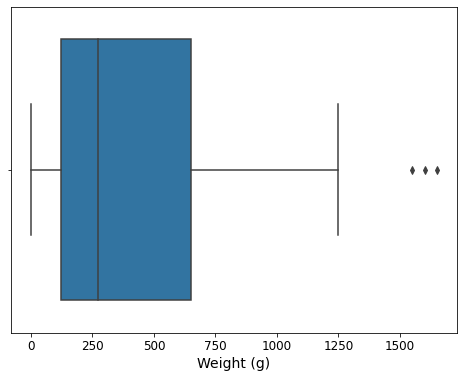

In [19]:
sns.boxplot(df['Weight'])
plt.xticks(size=12)
plt.xlabel('Weight (g)', size=14)

plt.show()

#### Analyzing outliers for weight

In [20]:
df_W = df['Weight']

#quartiles
df_W_q1 = df_W.quantile(0.25)
df_W_q2 = df_W.quantile(0.5)
df_W_q3 = df_W.quantile(0.75)

#inter quartile range
df_W_iqr = df_W_q3 - df_W_q1

#lower whisker point
df_W_lower = df_W_q1 - (1.5 * df_W_iqr)

#upper whisker point
df_W_upper = df_W_q3 + (1.5 * df_W_iqr)

df_W_outliers = df_W[(df_W < df_W_lower) | (df_W > df_W_upper)]
df_W_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

The observations 142, 143 and 144 are outliers in case of weight.

### Outliers dataframe

In [21]:
df[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


We can see that all these three outliers belong to species 'Pike' which has in total 17 fishes in our dataset.
There are two ways to deal with outliers - we can either remove them or can replace with a new value. Since we have just 3 outliers in our data set, we will remove them.

#### Removing the outliers

In [22]:
df.drop([142, 143, 144], inplace=True)

In [23]:
df.shape

(156, 7)

The outliers have been successfully deleted and leaving us with 156 observations instead of 159.

## Correlation between variables

Correlation indicates pairwise correlation between continuous variables in the dataset. While calculating the correlation, categorical variables are ignored, so 'Species' has been automatically ignored from our dataset. Correlation also excludes the NULL values but we do not have any NULL values in our dataset.

In [24]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.895743,0.899759,0.907292,0.801871,0.923432
Length1,0.895743,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.899759,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.907292,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.801871,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.923432,0.889166,0.895584,0.897053,0.800542,1.000000


### Correlation Heatmap

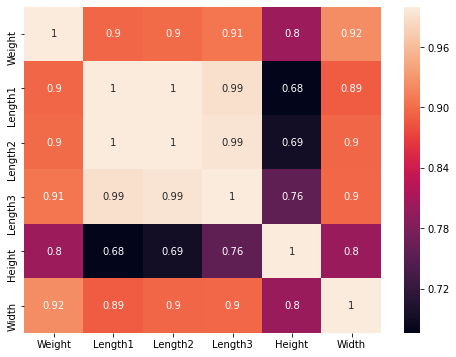

In [25]:
sns.heatmap(df.corr(), annot=True)

plt.show()

Heatmap is a great way to visually look at the relationship between variables. The colors indicate the magnitude of correlation between the two variables. 
We can see that many variables indicate positive correlation with a few variables showing very strong positive correlation with values close of 0.9.

The variables Length1, Length2 and Length3 are highly correlated leading to multicolinearity. Thus, we can drop two of the length variables and just keep one in order to do our regression analysis. 
Note that we usually drop variables with correlation coefficient, r = +/- 0.9 or above.

### Pairplot

Pairplot allows us to see both the distribution of the variable and pairwise relationship between variables in the dataset.

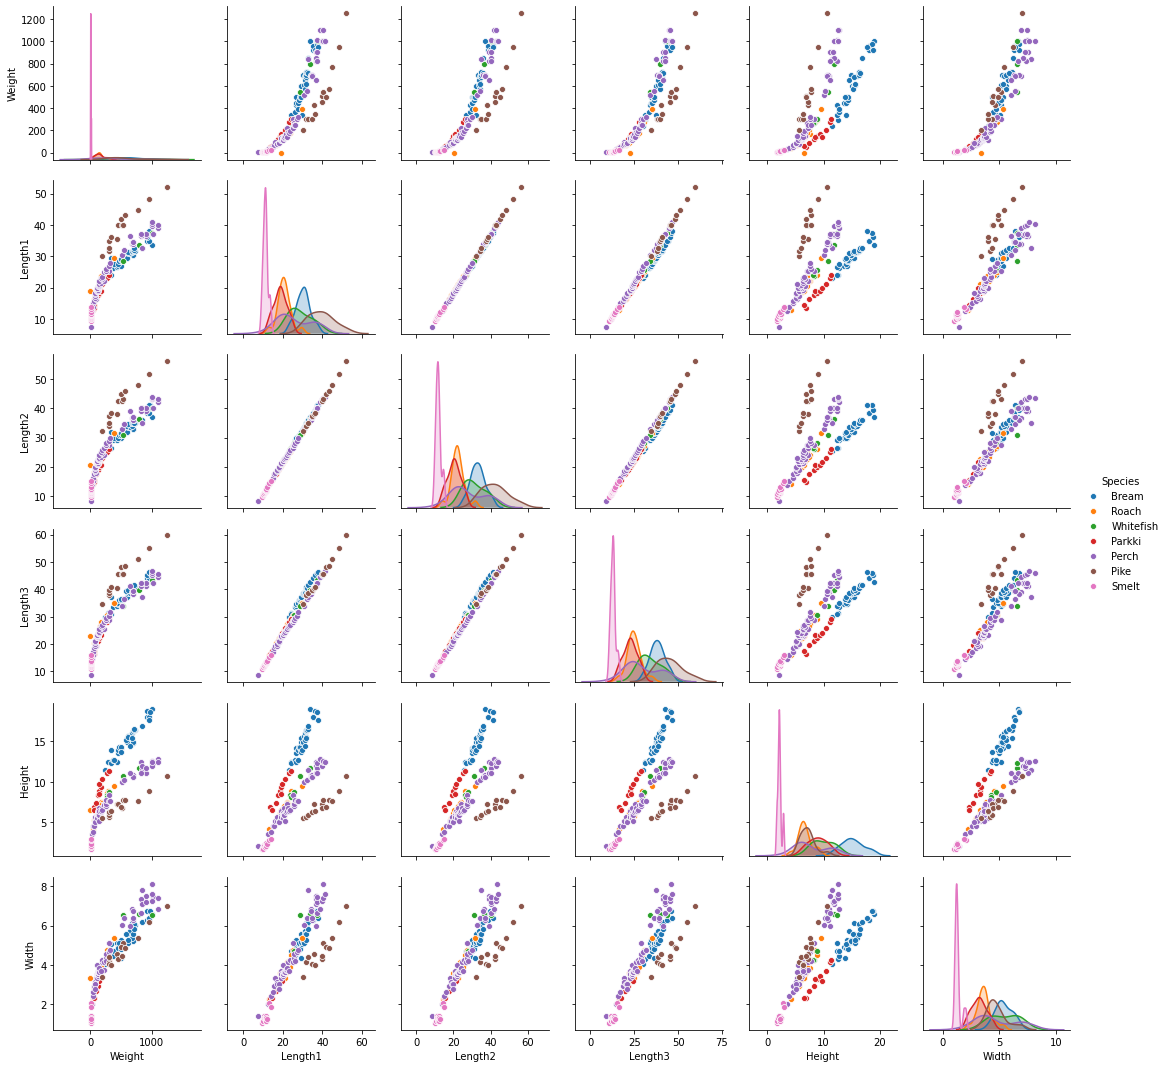

In [26]:
sns.pairplot(df, hue='Species')
plt.show()

The perfect linear representation of graphs between Length1, Length2 and Length3 indicates that our idea of dropping two from these three is correct.

# Dropping variables to avoid multicollinearity

In [27]:
df.drop(['Length2', 'Length3'], axis=1, inplace=True)

In [28]:
df.head()

,Species,Weight,Length1,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


In [29]:
df.shape

(156, 5)

## Use of Domain Knowledge

#### Dropping the fishes with weight less than equal to zero.

In [62]:
df[df['Weight'] <= 0]

,Species,Weight,Length1,Height,Width
40,Roach,0.0,19.0,6.4752,3.3516


In [63]:
df.drop([40], inplace=True)

In [64]:
df.shape

(155, 5)

In [30]:
df.describe()

,Weight,Length1,Height,Width
count,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,8.951128,4.375719
std,319.546978,9.119630,4.324325,1.672188
min,0.000000,7.500000,1.728400,1.047600
25%,120.000000,19.000000,5.931675,3.369600
50%,271.000000,25.000000,7.647800,4.243300
75%,612.500000,32.125000,12.378550,5.424375
max,1250.000000,52.000000,18.957000,8.142000


# Machine Learning model

The pairplot indicates that the explanatory variables have linear relationship with the dependent variable, so it is good to fit a linear regression model to this dataset.

### Deoendent and independent variables

In [31]:
#all variables except Weight and Species
X = df.iloc[:,2:]

#Weight variable only
y = df['Weight']

### Splitting the dataset into training and testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", X_test.shape)
print("Shape of X_test: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (124, 3)
Shape of y_train:  (32, 3)
Shape of X_test:  (124,)
Shape of y_test:  (32,)


## Multiple Linear Regression model

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Model parameters

In [35]:
print("Intercept of the model: ", lm.intercept_)
print("Coefficient of the model: ", lm.coef_)

Intercept of the model:  -405.8713445524378
Coefficient of the model:  [11.09650963 14.06025014 84.99036109]


### Model equation

In [55]:
print("Y = ", lm.intercept_, "+", lm.coef_[0], "*", df.columns[2], "+", lm.coef_[1], "*", df.columns[3], "+", lm.coef_[2], "*", df.columns[4])


Y =  -405.8713445524378 + 11.096509625172981 * Length1 + 14.060250138482722 * Height + 84.99036108571607 * Width


### Prediction

In [37]:
y_pred = lm.predict(X_test)

In [38]:
df_y_test = pd.DataFrame(y_test)
df_y_test1 = df_y_test.reset_index(drop=True)
df_y_test1.head()

,Weight
0,85.0
1,250.0
2,900.0
3,300.0
4,925.0


In [39]:
df_y_pred = pd.DataFrame(y_pred, columns=["Predicted weight"])
df_y_pred.head()

,Predicted weight
0,121.981196
1,348.801511
2,792.601410
3,379.531028
4,833.170487


In [40]:
df_y = pd.concat([df_y_test1, df_y_pred], axis=1)
df_y.head()

,Weight,Predicted weight
0,85.0,121.981196
1,250.0,348.801511
2,900.0,792.601410
3,300.0,379.531028
4,925.0,833.170487


### R2 Score

In [41]:
print(r2_score(y_test, y_pred))

0.8896602213768718


## Plot for actual and predicted values

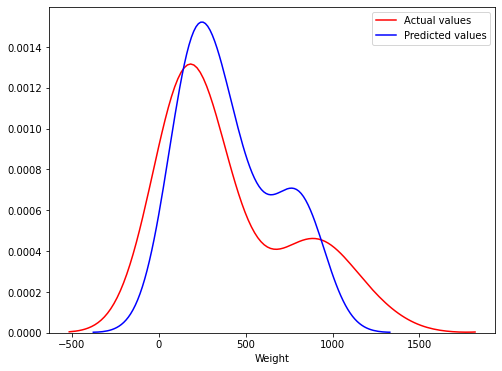

In [58]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual values")
sns.distplot(y_pred, hist=False, color="b", label="Predicted values", ax=ax1)
plt.show()

### We can see that our predictions are good but still not that close. Let us try to fit a polynomial regression on this data.

## Multi-dimensional Polynomial Regression

In [42]:
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)

In [43]:
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

LinearRegression()

### Model parameters

In [44]:
print("Intercept of the model: ", lm_poly.intercept_)
print("Coefficient of the model: ", lm_poly.coef_)

Intercept of the model:  120.3242766839665
Coefficient of the model:  [  0.         -10.66246481 -10.62428028 -38.55368132   0.06135865
   0.89129362   3.35395452  -0.69899806   4.75848635  -2.26390574]


### Prediction

In [45]:
X_poly_test = polynomial_features.fit_transform(X_test)
y_poly_pred = lm_poly.predict(X_poly_test)
y_poly_pred

array([  76.02962154,  259.57802863,  868.59555898,  277.4037195 ,
       1033.24005249,   74.53551286,  115.20234862,  129.04740145,
        681.18889756,  457.84440535,  112.10407719,   43.628817  ,
        588.92832242,  172.78696911,  132.04174471, 1069.33195056,
        437.03593396,  319.57312583,   72.99330561,  114.36816779,
       1227.35842583,  229.93488116,  320.88957908,  299.94013273,
        203.61211822,  913.55804317,  122.53920705,  182.78635784,
        909.21573172,  144.0711992 ,  937.40046266,  109.82074376])

In [46]:
df_y_poly_pred = pd.DataFrame(y_poly_pred, columns=["Predicted weight"])
df_y_poly_pred.head()

,Predicted weight
0,76.029622
1,259.578029
2,868.595559
3,277.403720
4,1033.240052


In [47]:
df_y_poly = pd.concat([df_y_test1, df_y_poly_pred], axis=1)
df_y_poly.head()

,Weight,Predicted weight
0,85.0,76.029622
1,250.0,259.578029
2,900.0,868.595559
3,300.0,277.403720
4,925.0,1033.240052


### R2 Score

In [48]:
print(r2_score(y_test, y_poly_pred))

0.9784646296369155


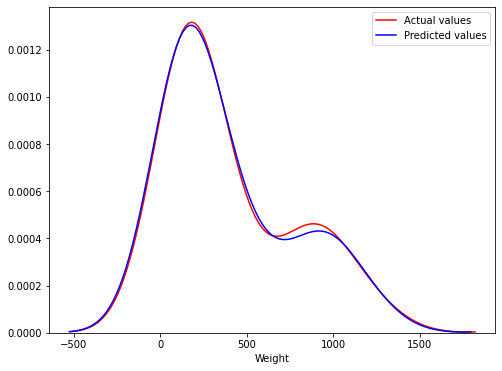

In [61]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual values")
sns.distplot(y_poly_pred, hist=False, color="b", label="Predicted values", ax=ax1)
plt.show()

### We can see that our predictions are really good using a polynomial of degree 2. Also, since polynomial regression of degree 2 has given us such good predictions, we will not explore other machine learning algorithms.